In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from datetime import timedelta


Таблица с уникальными идентификаторами пользователей:

In [2]:
uniq_customer=pd.read_csv('olist_customers_dataset.csv')
uniq_customer.head(2)
#customer_id — позаказный идентификатор пользователя
#customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)
#customer_zip_code_prefix —  почтовый индекс пользователя
#customer_city —  город доставки пользователя
#customer_state —  штат доставки пользователя

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [3]:
uniq_customer.shape

(99441, 5)

Таблица заказов:

In [4]:
order_table=pd.read_csv('olist_orders_dataset.csv')
order_table.head(2)
#order_id —  уникальный идентификатор заказа (номер чека)
#customer_id —  позаказный идентификатор пользователя

#order_status —  статус заказа(created —  создан; approved —  подтверждён; invoiced —  выставлен счёт; 
#processing —  в процессе сборки заказа; shipped —  отгружен со склада; delivered —  доставлен пользователю;
#unavailable —  недоступен; canceled —  отменён)

#order_purchase_timestamp —  время создания заказа
#order_approved_at —  время подтверждения оплаты заказа
#order_delivered_carrier_date —  время передачи заказа в логистическую службу
#order_delivered_customer_date —  время доставки заказа
#order_estimated_delivery_date —  обещанная дата доставки

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [5]:
order_table.shape

(99441, 8)

Товарные позиции, входящие в заказы:

In [6]:
order_id_status=pd.read_csv('olist_order_items_dataset.csv')
order_id_status.head(2)
#order_id —  уникальный идентификатор заказа (номер чека)
#order_item_id —  идентификатор товара внутри одного заказа
#product_id —  ид товара (аналог штрихкода)
#seller_id — ид производителя товара
#shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике
#price —  цена за единицу товара
#freight_value —  вес товара


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


In [7]:
order_id_status.shape

(112650, 7)

Проверила наличие и количество пропущенных значений в полученной таблице.
В колонках order_approved_at(время подтверждения оплаты заказа),
order_delivered_carrier_date(время передачи заказа в логистическую службу), 
order_delivered_customer_date(время доставки заказа) 
есть пропущенные значения. Я не удаляла столбцы, 
т.k. предполагаю, что вероятно это ошибка на уровне системы доставки и отсутствие данных в этих столбцах не влияет на доставку товара; 



In [8]:
uniq_customer.isna().sum()


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [9]:
order_table.isna().sum()
#есть пропущенные значения в трех столбцах (вероятно ошибка системы доставки), пока менять не буду

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [10]:
order_id_status.isna().sum()


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

1. Сколько у нас пользователей, которые совершили покупку только один раз?

Для ответа мне необходимо соединить таблицу с уникальными идентификаторами пользователей ('uniq_customer') 
и таблицу заказов ('order_status').
Объединение идёт по общей колонке, у которой имеется одинаковый смысл и общие значения
в обоих датафреймах 'customer_id'.

In [11]:
customer_unique_id_order=uniq_customer.merge(order_table, how='inner', on='customer_id')
customer_unique_id_order.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00


In [12]:
customer_unique_id_order.isna().sum()  #выходит, что у нас нет заказов у которых нет уникальных пользователей

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [13]:
test=order_table.merge(uniq_customer, how='left', on='customer_id')

In [14]:
test.isna().sum()    #проверила, что нет таких заказов по которым нет пользователей

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

Из таблицы выбрала только тех уникальных пользователей, кто оплатил покупку (order_status != 'created'),
так как этот статус говорит не о факте покупки, а о намерении ее совершить;
затем посчитала на каждого количество заказов ('customer_id');
Для ответа нам необходимы пользователи, которые совершили покупку только один раз.

In [15]:
uniq_customers=customer_unique_id_order.query("order_status!='created'")\
     .groupby('customer_unique_id').agg({'order_id':'count'}).query("order_id=='1'").sum()
uniq_customers

order_id    0.0
dtype: float64

Вывод: 
    Количество пользователей (которые совершили покупку только один раз) равно 93096.

Для сравнения привела количество пользователей, 
кто оплатил покупку (один и более раз) - 99436. Судя по всему, такая разница из-за специфики и потребности товара.

In [16]:
customer_unique_id_order_count=customer_unique_id_order.query("order_status!='created'")\
     .groupby('customer_unique_id').agg({'order_id':'count'}).sum()
customer_unique_id_order_count

order_id    99436
dtype: int64

2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [17]:
#order_status —  статус заказа(created —  создан; approved —  подтверждён; invoiced —  выставлен счёт; 
#processing —  в процессе сборки заказа; shipped —  отгружен со склада; delivered —  доставлен пользователю;
#unavailable —  недоступен; canceled —  отменён)

#order_purchase_timestamp —  время создания заказа
#order_approved_at —  время подтверждения оплаты заказа
#order_delivered_carrier_date —  время передачи заказа в логистическую службу
#order_delivered_customer_date —  время доставки заказа
#order_estimated_delivery_date —  обещанная дата доставки

In [18]:
order_table.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


Проверила данные на содержание избыточных(повторяющихся) значений,
чтобы исключить наличие разных статусов по одному заказу от уникального пользователя;

In [19]:
control_0=order_table.groupby('order_id', as_index=False).agg({'order_status':'count'}).nunique()
control_0

order_id        99441
order_status        1
dtype: int64

Выяснила, что есть товары со статусом 'canceled',
которые были доставлены (указано время  'order_delivered_customer_date') и это 6 заказов.
Очевидно, что эти заказы не стоит учитывать в расчетах для ответа, скорее всего их отменили покупатели по неясным причинам. 


In [20]:
#общее количество заказов со статусом 'canceled'
order_delivered_canceled=order_table.query("order_status=='canceled'").order_delivered_customer_date.isna().count()
order_delivered_canceled

625

In [21]:
#общее количество заказов со статусом 'canceled' без указанного времени доставки 'order_delivered_customer_date'
order_delivered_customer_date_canceled=order_table.query("order_status=='canceled'")\
                                                  .order_delivered_customer_date.isna().sum()
order_delivered_customer_date_canceled

619

In [22]:
count_order_status=order_table.groupby('order_status').agg({'order_delivered_customer_date':'count'})
count_order_status #число доставленных заказов с указанным временем доставки покупателю

,order_delivered_customer_date
order_status,
approved,0
canceled,6
created,0
delivered,96470
invoiced,0
processing,0
shipped,0
unavailable,0


Выяснила, что не все доставленные заказы 'delivered' имеют дату доставки, точнее 8:

In [23]:
order_table_not_delivered=order_table.query("order_status=='delivered'").order_delivered_customer_date.isna().sum()
order_table_not_delivered

8

In [24]:
order_table_delivered_len=order_table.query("order_status=='delivered'").order_delivered_customer_date.shape
order_table_delivered_len  #число заказов 'delivered' 

(96478,)

In [25]:
order_table_unavailable=order_table.query("order_status=='unavailable'").order_delivered_customer_date.isna().sum()
order_table_unavailable #число заказов 'unavailable' без указания времени доставки покупателю 

609

In [26]:
order_table_unavailable_len=order_table.query("order_status=='unavailable'").order_delivered_customer_date.shape
order_table_unavailable_len #число заказов 'unavailable' 

(609,)

In [27]:
#для удобного для себя расчета заменила отсутствущие значения на 0 в колонке 'order_delivered_customer_date'
order_table['order_delivered_customer_date']=order_table.order_delivered_customer_date.fillna(0)
order_table.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Создала столбец 'order_purchase_timestamp_month' на основе 'order_purchase_timestamp'(время создания заказа),
приведенного к формату datetime(месяц год)

In [28]:
order_table['order_purchase_timestamp'] = pd.to_datetime(order_table.order_purchase_timestamp)

In [29]:
order_table['order_purchase_timestamp_month'] = order_table['order_purchase_timestamp'].dt.strftime('%b %Y')

In [30]:
order_table.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,Oct 2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,Jul 2018


Оставила все недоставленные заказы  (которые покупатель НЕ получил по различным причинам,
т.е. без указания времени доставки покупателю);
сгруппировала полученные данные по месяцу и статусу заказа, затем посчитала количество заказов соответственно;
для определения сколько заказов в месяц в среднем не доставляется по разным причинам,
после посчитала среднее количество заказов с определенным статусом;
переименовала  полученный столбец в 'avg_value_in_month';

In [31]:
avg_orders_in_month=order_table.query("order_delivered_customer_date==0")\
           .groupby(['order_purchase_timestamp_month','order_status'])\
           .agg({'order_id':'count'})\
           .groupby('order_status')\
           .agg({'order_id':'mean'})\
           .rename(columns={'order_id':'avg_value_in_month'}).reset_index()\
           .sort_values('avg_value_in_month', ascending=False)

In [32]:
avg_orders_in_month 

,order_status,avg_value_in_month
6,shipped,48.130435
7,unavailable,29.000000
1,canceled,25.791667
5,processing,15.842105
4,invoiced,14.952381
3,delivered,2.000000
2,created,1.666667
0,approved,1.000000


Подсчитала сумму:

In [33]:
avg_orders_in_month.loc[ len(avg_orders_in_month.order_status.index )] = ({'order_status':'not_delivered'\
         ,'avg_value_in_month':[round(avg_orders_in_month.avg_value_in_month.sum(),2)]})

In [34]:
avg_orders_in_month

,order_status,avg_value_in_month
6,shipped,48.130435
7,unavailable,29.0
1,canceled,25.791667
5,processing,15.842105
4,invoiced,14.952381
3,delivered,2.0
2,created,1.666667
0,approved,1.0
8,not_delivered,[138.38]


Получила, что ежемесячно в среднем недоставляется  по различным причинам около 138.38 заказов

Считаю, что статус 'created' не должен рассматривается для ответа, так как это заказы которые не были оплачены.
Мне интересно, когда доставка не была осуществлена по вине службы доставки или иным причинам 
(со статусами - unavailable, canceled, delivered==Nan).
Так как остальные статусы: 'approved', 'invoiced', 'processing', 'shipped' также не актульны потому что указывают,
что заказ оплачен и находится в процессе обработки и, следовательно доставки. 

In [35]:
# в дополнение визуализировала распределение статусов по времени, 
#т.к. статусы, кроме unavailable, вероятно могут меняться со временем

In [36]:
avg_orders_in_month_test=order_table.query("order_delivered_customer_date==0")\
           .groupby(['order_purchase_timestamp_month','order_status'], as_index=False)\
           .agg({'order_id':'count'})\
           .pivot(index='order_purchase_timestamp_month', columns='order_status', values='order_id').reset_index()

avg_orders_in_month_test

order_status,order_purchase_timestamp_month,approved,canceled,created,delivered,invoiced,processing,shipped,unavailable
0,Apr 2017,1.0,18.0,NaN,NaN,14.0,10.0,49.0,9.0
1,Apr 2018,NaN,15.0,NaN,NaN,14.0,8.0,99.0,5.0
2,Aug 2017,NaN,27.0,NaN,NaN,20.0,18.0,41.0,32.0
3,Aug 2018,NaN,84.0,NaN,NaN,23.0,NaN,47.0,7.0
4,Dec 2017,NaN,11.0,2.0,NaN,13.0,35.0,57.0,42.0
5,Feb 2017,1.0,17.0,NaN,NaN,11.0,32.0,21.0,45.0
6,Feb 2018,NaN,72.0,1.0,NaN,6.0,6.0,57.0,30.0
7,Jan 2017,NaN,3.0,NaN,NaN,12.0,9.0,16.0,10.0
8,Jan 2018,NaN,34.0,NaN,NaN,15.0,29.0,74.0,48.0
9,Jul 2017,NaN,28.0,NaN,NaN,7.0,11.0,56.0,52.0


<AxesSubplot:xlabel='order_purchase_timestamp_month'>

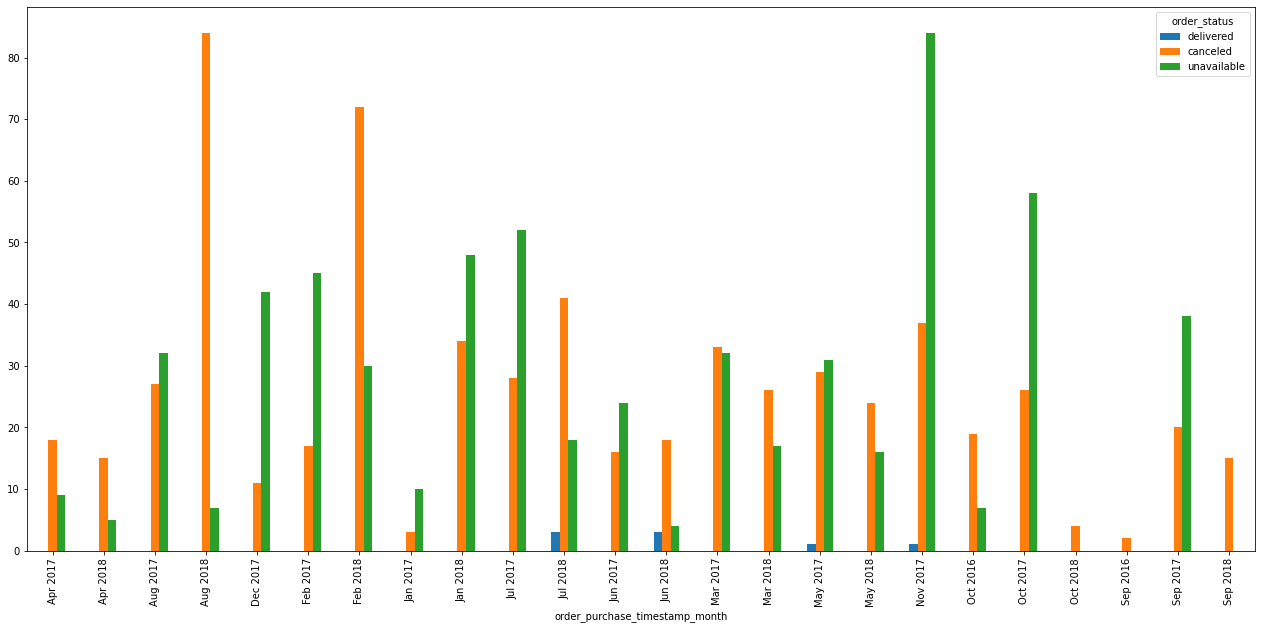

In [37]:
avg_orders_in_month_test.plot(x="order_purchase_timestamp_month",
                              y=['delivered','canceled','unavailable'],
                              kind="bar", figsize = (22,10))

Больше всего недоставленных заказов по причине 'canceled' (например отменен покупателем) было в августе 2018.
Со статусом 'unavailable' (когда заказ отменен до получения покупателем по различным причинам, 
 например из-за отсутствия покупателя по месту доставки) было в ноябре 2017.
Со статусом 'delivered' (когда заказ обозначается как доставленный, но нет даты доставки продавцу)
выявляются в мае(1 заказ) и ноябре(1 заказ) 2017, июне(3 заказа) и июле(3 заказа) 2018. Я предполагаю, что это связано со сбоем 
в системе слежения за заказом или человеческим фактором(новый сотрудник) и стоит обратить на это внимание, чтобы устранить причину,
так как в 2017 году было 2 таких заказа, а в 2018 уже 6.

3. По каждому товару определить, в какой день недели товар чаще всего покупается.

In [38]:
#добавила к  таблице 'customer_unique_id_order' товарные позиции, входящие в заказы
product_id_order=customer_unique_id_order.merge(order_id_status, how='inner', on='order_id')
product_id_order.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
dtype: int64

In [39]:
# Создала столбец 'day_of_week' на основе 'order_purchase_timestamp'(время создания заказа),
#приведенного к формату datetime(day_name)
product_id_order['order_purchase_timestamp'] = pd.to_datetime(product_id_order.order_purchase_timestamp)
product_id_order['day_of_week']=product_id_order['order_purchase_timestamp'].dt.day_name()

In [40]:
product_id_order.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day_of_week
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,Tuesday
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,Friday


Cгруппировала столбцы с названием товаров и днями;
посчитала количество заказанных  товаров в определенный день недели;
отсортировала по убыванию;
оставила только те уникальные названия товаров, которые заказывали чаще;
По каждому товару определила, в какой день недели товар чаще всего покупается  

In [41]:
product_id_order_day_of_week=product_id_order.query("order_status!='created' & order_status!='canceled'")\
                .groupby(['product_id','day_of_week'])\
                .agg({'order_status':'count'})\
                .sort_values('order_status', ascending=False).reset_index()\
                .drop_duplicates(subset=['product_id'], keep='first')\
                .rename(columns={'order_status':'count_orders'})\
                [['product_id','day_of_week']]
                
product_id_order_day_of_week  #ответ на поставленный вопрос

,product_id,day_of_week
0,422879e10f46682990de24d770e7f83d,Wednesday
1,99a4788cb24856965c36a24e339b6058,Monday
2,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday
8,53b36df67ebb7c41585e8d54d6772e08,Tuesday
12,368c6c730842d78016ad823897a372db,Friday
...,...,...
60892,6432d844f2be41bb6f2fd279e23415da,Friday
60893,6435535083cf42eb1ce5d96f2c4d3482,Tuesday
60894,6435be64ad92f52631170f9a92718a99,Sunday
60895,64367bed3ed96fd9381676fbe33b6443,Sunday


In [42]:
a=product_id_order_day_of_week.groupby('day_of_week', as_index=False)\
                              .agg({'product_id':'count'})\
                              .sort_values('product_id', ascending=False)
a

,day_of_week,product_id
1,Monday,5798
0,Friday,5351
5,Tuesday,4845
6,Wednesday,4753
4,Thursday,4605
3,Sunday,3824
2,Saturday,3559


<AxesSubplot:xlabel='day_of_week'>

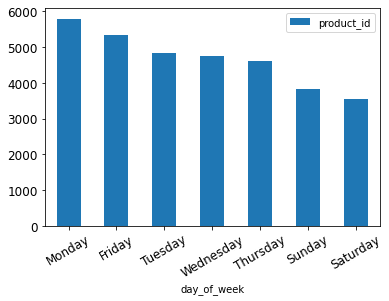

In [43]:
a.plot(x="day_of_week", y="product_id", kind="bar", rot=30, fontsize=12)

Также к ответу хочется добавить, что чаще всего продажи происходят в понедельник, 
реже в субботу. 

4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?
Не стоит забывать, что внутри месяца может быть не целое количество недель.
Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [44]:
#привела столбцы с датой и временем к удобному для расчета формату и определила сколько в конкретном месяце недель
product_id_order['order_purchase_timestamp'] = pd.to_datetime(product_id_order.order_purchase_timestamp)
product_id_order['month']=product_id_order['order_purchase_timestamp'].dt.to_period('M')
product_id_order['week_in_month']=product_id_order['order_purchase_timestamp'].dt.days_in_month/7 

In [45]:
product_id_order.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day_of_week,month,week_in_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,Tuesday,2017-05,4.428571
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-02-06 00:00:00,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,Friday,2018-01,4.428571


Отобрала совершенные покупки, затем отобрала id уникальных клиентов по месяцам и неделям внутри месяца;
затем вычислила количество покупок в месяц на каждого клиента;

In [46]:
customer_by_month = product_id_order.query("order_status == 'delivered'")\
        .groupby(['customer_unique_id','month','week_in_month'], as_index=False).agg({'order_status':'count'})\
        .rename(columns={'order_status':'avg_orders'})

In [47]:
customer_by_month.head()

,customer_unique_id,month,week_in_month,avg_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.428571,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.428571,1
2,0000f46a3911fa3c0805444483337064,2017-03,4.428571,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.428571,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.285714,1


Получила среднее количество покупок в неделю на каждого пользователя:

In [48]:
customer_by_month['avg_orders'] = customer_by_month.avg_orders / customer_by_month.week_in_month
customer_by_month['avg_orders']

0        0.225806
1        0.225806
2        0.225806
3        0.225806
4        0.233333
           ...   
95189    0.466667
95190    0.225806
95191    0.250000
95192    0.225806
95193    0.225806
Name: avg_orders, Length: 95194, dtype: float64

Среднее количество покупок у каждого из пользователей в неделю (по месяцам):

In [49]:
avg_orders=customer_by_month[['month','customer_unique_id','avg_orders']]\
             .sort_values(['avg_orders'], ascending=False)\
             .pivot(index='customer_unique_id', columns='month', values = 'avg_orders')\
             .reset_index().fillna('0')
avg_orders 

month,customer_unique_id,2016-09,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
0,0000366f3b9a7992bf8c76cfdf3221e2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.225806,0,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.225806,0,0,0
2,0000f46a3911fa3c0805444483337064,0,0,0,0,0,0.225806,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0004aac84e0df4da2b147fca70cf8255,0,0,0,0,0,0,0,0,0,...,0.233333,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,0,0,0,0,0,0,0,0,0.466667,...,0,0,0,0,0,0,0,0,0,0
93354,fffea47cd6d3cc0a88bd621562a9d061,0,0,0,0,0,0,0,0,0,...,0,0.225806,0,0,0,0,0,0,0,0
93355,ffff371b4d645b6ecea244b27531430a,0,0,0,0,0.25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93356,ffff5962728ec6157033ef9805bacc48,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.225806,0,0,0


Проверила:

In [50]:
avg_orders.query("customer_unique_id=='0000366f3b9a7992bf8c76cfdf3221e2'")

month,customer_unique_id,2016-09,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
0,0000366f3b9a7992bf8c76cfdf3221e2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.225806,0,0,0


Эта таблица показывает среднее количество покупок в неделю каждого пользователя.

5. Используя pandas, проведи когортный анализ пользователей.
В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.


In [51]:
uniq_customer.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [52]:
order_table.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,Oct 2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,Jul 2018


In [53]:
retent_table=order_table.merge(uniq_customer, how='left', on='customer_id').query("order_status=='delivered'")\
           [['order_id', 'customer_id', 'customer_unique_id', 'order_purchase_timestamp', 'order_status']]

retent_table.head(3)

,order_id,customer_id,customer_unique_id,order_purchase_timestamp,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,delivered


In [54]:
retent_table['OrderPeriod'] = retent_table.order_purchase_timestamp.dt.to_period('M')

Теперь в DataFrame добавлен столбец OrderPeriod — дата в формате Год-Месяц,
отображающая месяц совершения целевого действия(покупки).

In [55]:
retent_table.head(3)

,order_id,customer_id,customer_unique_id,order_purchase_timestamp,order_status,OrderPeriod
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,delivered,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,delivered,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,delivered,2018-08


In [56]:
retent_table.set_index('customer_unique_id', inplace=True) #добавила индекс в DataFrame по 'customer_unique_id'

Cоздала столбец 'JoinMonth',
где выбрала минимальное значение OrderPeriod для каждого 'customer_unique_id' и добавила в наш DataFrame

In [57]:
retent_table['JoinMonth'] = retent_table.groupby(level=0)['order_purchase_timestamp']\
                                        .min().apply(lambda x: x.strftime('%Y-%m'))

retent_table.reset_index(inplace=True) #переиндексируем df

In [58]:
retent_table.head(3)

,customer_unique_id,order_id,customer_id,order_purchase_timestamp,order_status,OrderPeriod,JoinMonth
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,delivered,2017-10,2017-09
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,delivered,2018-07,2018-07
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,delivered,2018-08,2018-08


Добавила столбец TotalOrders для каждой строки с покупкой и заполнила нулями,
в котором далее поместила количество заказов

In [59]:
retent_table.insert(len(retent_table.columns), "TotalOrders", 0, allow_duplicates=False) 

In [60]:
retent_table.head(3)

,customer_unique_id,order_id,customer_id,order_purchase_timestamp,order_status,OrderPeriod,JoinMonth,TotalOrders
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,delivered,2017-10,2017-09,0
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,delivered,2018-07,2018-07,0
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,delivered,2018-08,2018-08,0


Вывела  количество уникальных пользователей и общее количество заказов, затем
переименовала некоторые столбцы для большей наглядности.

In [61]:
grouped=retent_table.groupby(['JoinMonth','OrderPeriod'])

In [62]:
cohorts = grouped.agg({'customer_unique_id': pd.Series.nunique,'TotalOrders': pd.Series.count})\
                 .reset_index()\
                 .rename(columns={'customer_unique_id':'TotalUsers','TotalOrders': 'TotalOrders'}) 

cohorts.head()

,JoinMonth,OrderPeriod,TotalUsers,TotalOrders
0,2016-09,2016-09,1,1
1,2016-10,2016-10,262,265
2,2016-10,2017-04,1,1
3,2016-10,2017-07,1,1
4,2016-10,2017-09,1,1


In [63]:
# переиндексировала DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['OrderPeriod','JoinMonth'], inplace=True)
cohorts.head()

,,index,TotalUsers,TotalOrders
OrderPeriod,JoinMonth,,,
2016-09,2016-09,0,1,1
2016-10,2016-10,1,262,265
2017-04,2016-10,2,1,1
2017-07,2016-10,3,1,1
2017-09,2016-10,4,1,1


Создадала ряд, содержаший размер каждой когорты JoinMonth

In [64]:
cohort_group_size = cohorts['TotalUsers'].groupby(level=1).first()
cohort_group_size.head()

JoinMonth
2016-09       1
2016-10     262
2016-12       1
2017-01     717
2017-02    1628
Name: TotalUsers, dtype: int64

Создадала матрицу, где каждый столбец представляет CohortPeriod 
и каждая строка является JoinMonth, соответствующие этой группе

In [65]:
cohorts['TotalUsers']

OrderPeriod  JoinMonth
2016-09      2016-09         1
2016-10      2016-10       262
2017-04      2016-10         1
2017-07      2016-10         1
2017-09      2016-10         1
                          ... 
2018-07      2018-06        25
2018-08      2018-06        16
2018-07      2018-07      5949
2018-08      2018-07        31
             2018-08      6144
Name: TotalUsers, Length: 219, dtype: int64

In [66]:
cohorts.reset_index()

,OrderPeriod,JoinMonth,index,TotalUsers,TotalOrders
0,2016-09,2016-09,0,1,1
1,2016-10,2016-10,1,262,265
2,2017-04,2016-10,2,1,1
3,2017-07,2016-10,3,1,1
4,2017-09,2016-10,4,1,1
...,...,...,...,...,...
214,2018-07,2018-06,214,25,25
215,2018-08,2018-06,215,16,16
216,2018-07,2018-07,216,5949,6007
217,2018-08,2018-07,217,31,31


Сейчас  разделила значения TotalUsers в когортах по cohort_group_size.


In [67]:
user_retention=cohorts['TotalUsers'].divide(cohort_group_size, axis=0)
user_retention=pd.DataFrame(user_retention).reset_index()
user_retention.head()

,OrderPeriod,JoinMonth,TotalUsers
0,2016-09,2016-09,1.000000
1,2016-10,2016-10,1.000000
2,2017-04,2016-10,0.003817
3,2017-07,2016-10,0.003817
4,2017-09,2016-10,0.003817


In [68]:
user_retention_1=user_retention.pivot(index='JoinMonth', columns='OrderPeriod', values='TotalUsers')
user_retention_1

OrderPeriod,2016-09,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
JoinMonth,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,NaN,1.0,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,...,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.007634,0.007634,NaN,NaN
2016-12,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,NaN,NaN,NaN,1.0,0.002789,0.002789,0.001395,0.004184,0.001395,0.004184,...,0.004184,0.001395,0.006974,0.004184,0.001395,0.001395,0.002789,0.004184,NaN,0.001395
2017-02,NaN,NaN,NaN,NaN,1.000000,0.001843,0.003071,0.001229,0.004300,0.001229,...,0.001843,0.001229,0.003071,0.001229,0.001843,0.001229,0.000614,0.000614,0.001843,NaN
2017-03,NaN,NaN,NaN,NaN,NaN,1.000000,0.004395,0.003596,0.003995,0.003596,...,0.003196,0.000799,0.003596,0.001199,0.001998,0.001199,0.001598,0.002397,0.000799,0.001199
2017-04,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.006206,0.002216,0.001773,...,0.003103,0.003103,0.001773,0.002660,0.000887,0.000443,0.000443,0.000887,0.000887,0.001330
2017-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.004636,0.004636,...,0.004057,0.001449,0.002608,0.002608,0.002608,0.003477,0.002318,0.000290,0.001739,0.002028
2017-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.004939,...,0.003951,0.003622,0.002305,0.001317,0.001976,0.002963,0.003622,0.001646,0.001646,0.002305


Вывела когорты в период с января по декабрь 2017 
(потому что из приведенных данных такой период есть только в 2017)

In [69]:
user_retention_fin=user_retention.query("JoinMonth>='2017-01' & JoinMonth<='2017-12'")\
                    .pivot(index='OrderPeriod', columns='JoinMonth', values='TotalUsers')
user_retention_fin

JoinMonth,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
OrderPeriod,,,,,,,,,,,,
2017-01,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02,0.002789,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03,0.002789,0.001843,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04,0.001395,0.003071,0.004395,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05,0.004184,0.001229,0.003596,0.006206,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06,0.001395,0.004300,0.003995,0.002216,0.004636,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
2017-07,0.004184,0.001229,0.003596,0.001773,0.004636,0.004939,1.000000,NaN,NaN,NaN,NaN,NaN
2017-08,0.001395,0.002457,0.001598,0.002660,0.002898,0.003951,0.005330,1.000000,NaN,NaN,NaN,NaN
2017-09,0.001395,0.001843,0.001598,0.002660,0.002898,0.004281,0.003465,0.006902,1.000000,NaN,NaN,NaN


Добавила визуализацию:

Text(0.5, 1.0, 'Retention')

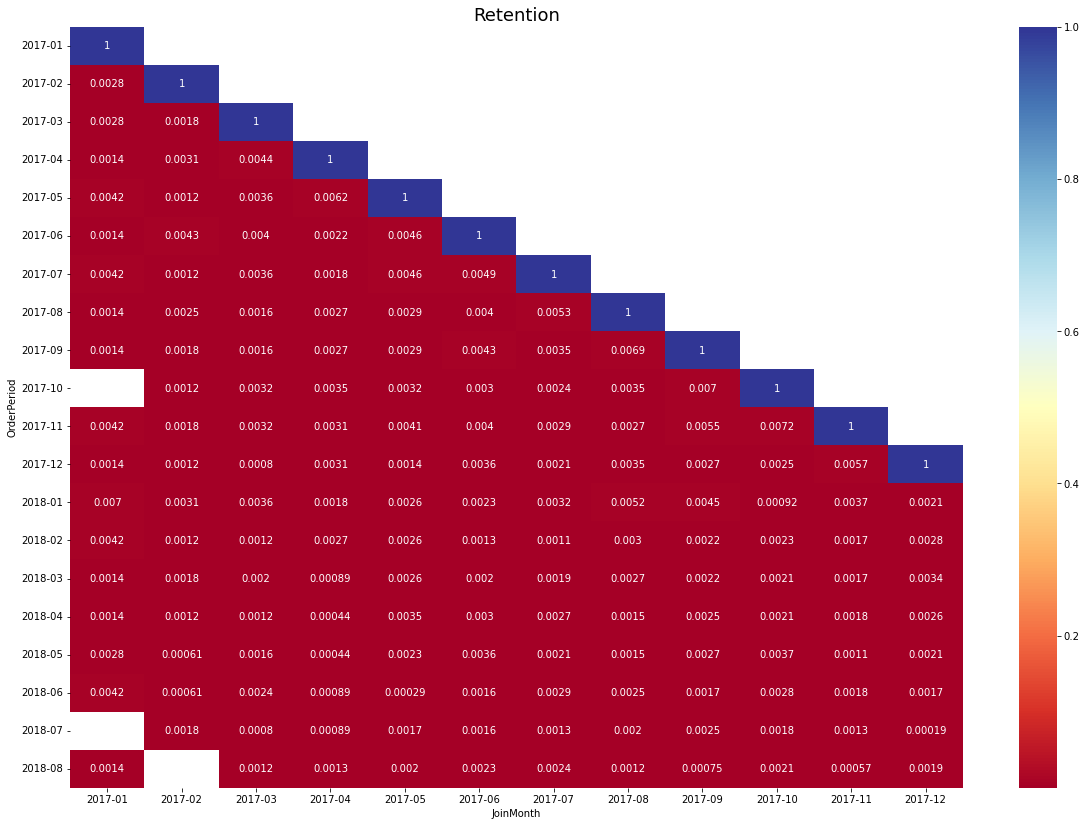

In [70]:
plt.figure(figsize=(20, 14))
sns.heatmap(user_retention_fin, cmap='RdYlBu', annot=True, fmt='.2g').set_title('Retention', fontsize=18)

ОТВЕТ: 
    
В период с января по декабрь группа JoinMonth==2017-09 была с самым высоким retention на 3й месяц,
где Retention=0.0055 

6. Часто для качественного анализа аудитории используют подходы, основанные на сегментации.
Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.
В кластеризации можешь выбрать следующие метрики:
R - время от последней покупки пользователя до текущей даты, 
F - частота покупок у пользователя за всё время,
M - сумма сделок за всё время.
Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. 
Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик
recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

Для начала соединила  датасеты 

In [71]:
table=order_table.merge(uniq_customer, how="left", on="customer_id")
work_table=table.merge(order_id_status, how="inner", on="order_id")
work_table.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp_month,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,Oct 2017,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,Jul 2018,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,Aug 2018,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


Проверила на наличие пустых значений и выяснила объем

In [72]:
work_table.shape

(112650, 19)

In [73]:
work_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   order_id                        112650 non-null  object        
 1   customer_id                     112650 non-null  object        
 2   order_status                    112650 non-null  object        
 3   order_purchase_timestamp        112650 non-null  datetime64[ns]
 4   order_approved_at               112635 non-null  object        
 5   order_delivered_carrier_date    111456 non-null  object        
 6   order_delivered_customer_date   112650 non-null  object        
 7   order_estimated_delivery_date   112650 non-null  object        
 8   order_purchase_timestamp_month  112650 non-null  object        
 9   customer_unique_id              112650 non-null  object        
 10  customer_zip_code_prefix        112650 non-null  int64  

Отобрала все совершенные покупки (order_status!='created', т.к. это скорее намерение совершить покупку) 
и столбцы по которым буду проводить расчет

In [74]:
work_table=work_table.query("order_status!='created'")\
          [['customer_unique_id', 'order_purchase_timestamp', 'product_id', 'price']]
work_table.head(5)

,customer_unique_id,order_purchase_timestamp,product_id,price
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,29.99
1,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,118.70
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,aa4383b373c6aca5d8797843e5594415,159.90
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,d0b61bfb1de832b15ba9d266ca96e5b0,45.00
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,65266b2da20d04dbe00c5c2d3bb7859e,19.90


Перевела столбец в формат datetime

In [75]:
work_table['order_purchase_timestamp'] = pd.to_datetime(work_table.order_purchase_timestamp)

In [76]:
work_table.head(2)

,customer_unique_id,order_purchase_timestamp,product_id,price
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,29.99
1,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,595fac2a385ac33a80bd5114aec74eb8,118.70


Так как датасет не самый свежий, вместо текущей даты буду использовать max+1. 
Для создания recency, frequency и monetary мы сгруппируем наши записи по customer_id.
Переименовала названия колонок для удобства.

In [77]:
last_date = work_table['order_purchase_timestamp'].max() + timedelta(days=1)
rfmTable = work_table.reset_index().groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda x: (last_date - x.max()).days,
                                                 'product_id': lambda x: len(x), 
                                                 'price': lambda x: x.sum()})
rfmTable.rename(columns={'order_purchase_timestamp': 'recency', 
                          'product_id': 'frequency', 
                          'price': 'monetary'}, inplace=True)

In [78]:
rfmTable.head()

,recency,frequency,monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
0000f46a3911fa3c0805444483337064,542,1,69.00
0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
0004aac84e0df4da2b147fca70cf8255,293,1,180.00


Необходимо оценить наши результаты. Я буду разбивать на диапазон от 1 до 4 с использованием квантилей. 
Сортирую данные по одному из критериев и делю на равные группы.


In [79]:
quantiles = rfmTable.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()
segmented_rfm = rfmTable

# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
 
 #Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FM_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4



segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(R_Class, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FM_Class, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary'].apply(FM_Class, args=('monetary',quantiles,))
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str)\
                                                              + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()


,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFMScore
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,4,1,3,413
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,4,1,1,411
0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112
0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211
0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,4,214


Среднее значение recency по всем RFMScore.

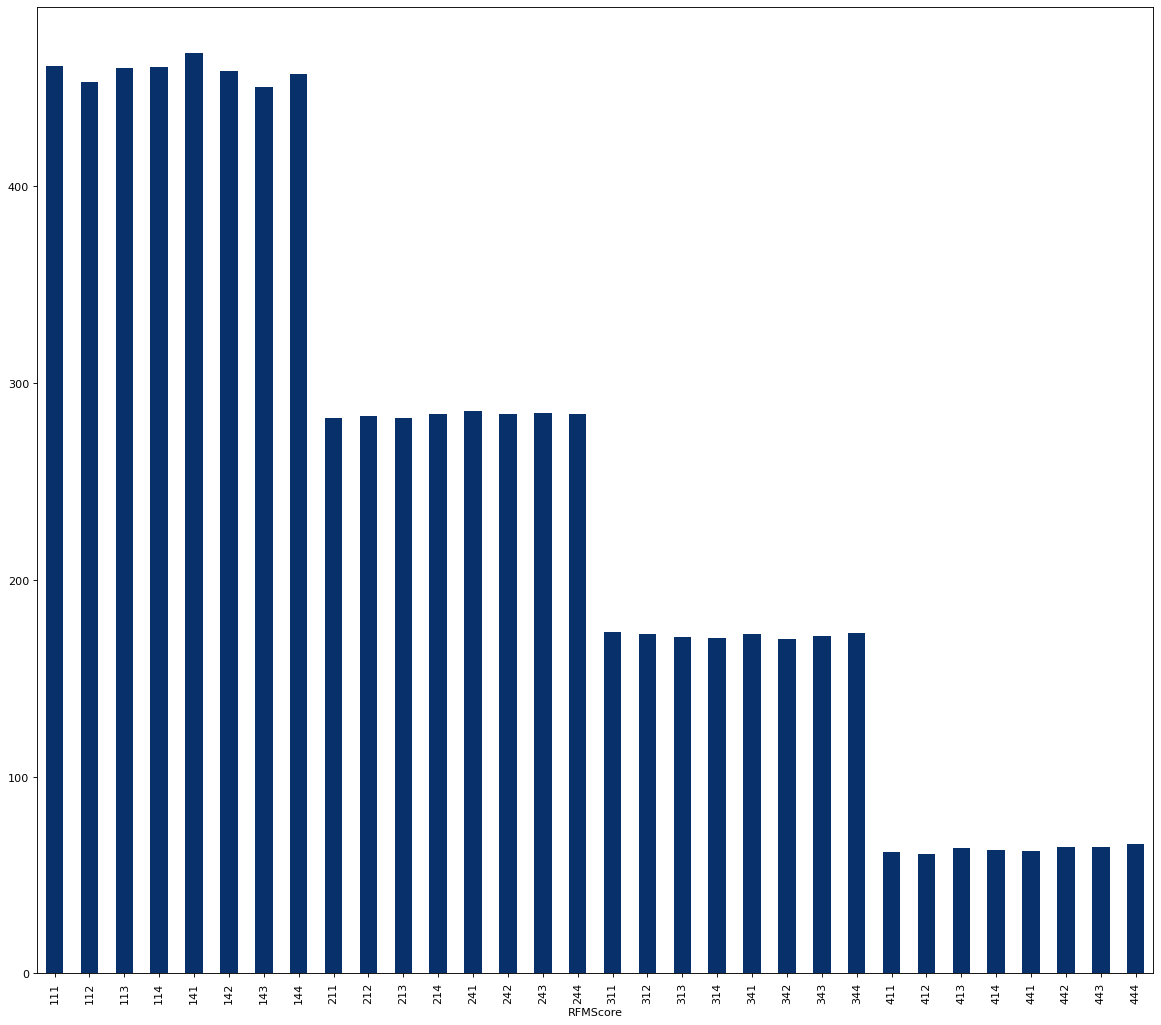

In [80]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
segmented_rfm.groupby('RFMScore').agg('recency').mean().plot(kind='bar', colormap='Blues_r')
plt.show()

Вывод:
    Цель RFM анализа сформировать сегменты и, в зависимости от сегмента, воздействовать на них
    определенным образом. Например, предложить бонус или льготу. 
    Важно делать это таргетировано (с целью экономии).
    Эффект от использования RFM анализа может быть следующим:
        -удержание клиентов, 
        -повышение дохода, 
        -повышение лояльность клиентов.

Примеры интерпретации сегментов RFM анализа:

R=4, F=4, M=4 — платят чаcто, много и недавно. Самые лояльным и активные пользователи.


 R=1, F=1, M=1 — платят мало, редко и давно. Скорее всего потерянные клиенты. Возможно не стоит предпринимать действия по их возврату, если цена привлечения выше ожидаемой прибыли. 

R=1/2, F=3/4, M=3/4 — лояльные пользователи на грани ухода. 
Предложила бы им бонус, скидку и пыталась бы их вернуть.

 R=3/4, F=1, M=1/2/3/4 — пользователи недавно совершили платеж. Необходимо стимулировать покупать еще.

Границы frequency 1-3: по  1 заказу; 4 = от 1 до 24:

In [81]:
segmented_rfm.frequency.quantile(q=[0.25, 0.5, 0.75])

0.25    1.0
0.50    1.0
0.75    1.0
Name: frequency, dtype: float64

In [82]:
segmented_rfm.frequency.max()

24

Границы recency 1 = от 353.1 до 729; 2 = от 224.1 до 353.0; 3 = от 119.1 до 224.0; 4 = от 0 до 119.0;

In [83]:
segmented_rfm.recency.quantile(q=[0.25, 0.5, 0.75])

0.25    119.0
0.50    224.0
0.75    353.0
Name: recency, dtype: float64

In [84]:
segmented_rfm.recency.max()

729

Границы monetary 1 = от 0 до 47.9; 2 = от 48 до 89.9; 3 = от 90 до 155.0;
4 = от 155.1 до 13440.0; 

In [85]:
segmented_rfm.monetary.quantile(q=[0.25, 0.5, 0.75])

0.25     47.9
0.50     89.9
0.75    155.0
Name: monetary, dtype: float64

In [86]:
segmented_rfm.monetary.max()

13440.0